<a href="https://colab.research.google.com/github/g7-bit/YBI_Project/blob/main/Ybi_Final_Ds%26ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Financial Market News Sentiment Analysis**

-------------

## **Objective**

The objective of this project is to develop a machine learning model that can accurately classify financial market news articles based on their textual content. The model will be trained on a provided dataset consisting of news articles and their corresponding labels. By utilizing natural language processing techniques and a random forest classifier, we aim to create a robust and reliable system for categorizing financial news articles. The project will involve preprocessing the dataset, extracting relevant features, and training the model to achieve high accuracy in predicting the news article labels. The final evaluation of the model's performance will be based on metrics such as accuracy, confusion matrix, and classification report. This project aims to provide insights into the application of machine learning in the financial domain and its potential for automating news categorization tasks.

## **Data Source**

The data for this project is sourced from a financial market news dataset. The dataset contains a collection of news articles along with their corresponding labels. The dataset provides valuable information for training and evaluating a machine learning model designed to classify financial market news articles. The dataset used in this project can be accessed and obtained from the following URL:

Financial Market News Dataset: https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Financial%20Market%20News.csv

The dataset includes relevant attributes such as the news article text and the associated labels. These labels represent different categories or classes to which the news articles belong. The dataset is provided in a structured format, making it suitable for data analysis and machine learning tasks.

By utilizing this dataset, we aim to develop a classification model that can effectively categorize financial market news articles, providing valuable insights into the potential applications of machine learning in the financial domain.

## **Import Library**

In [1]:
import pandas as pd

import numpy as np

## **Import Data**

In [2]:


df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Financial%20Market%20News.csv', encoding='ISO-8859-1')
df.head()


,Date,Label,News 1,News 2,News 3,News 4,News 5,News 6,News 7,News 8,...,News 16,News 17,News 18,News 19,News 20,News 21,News 22,News 23,News 24,News 25
0,01-01-2010,0,McIlroy's men catch cold from Gudjonsson,Obituary: Brian Walsh,Workplace blues leave employers in the red,Classical review: Rattle,Dance review: Merce Cunningham,Genetic tests to be used in setting premiums,Opera review: La Bohème,Pop review: Britney Spears,...,Finland 0 - 0 England,Healy a marked man,Happy birthday Harpers & Queen,Win unlimited access to the Raindance film fes...,Labour pledges £800m to bridge north-south divide,Wales: Lib-Lab pact firm despite resignation,Donald Dewar,Regenerating homes regenerates well-being in ...,Win £100 worth of underwear,TV guide: Random views
1,02-01-2010,0,Warning from history points to crash,Investors flee to dollar haven,Banks and tobacco in favour,Review: Llama Farmers,War jitters lead to sell-off,Your not-so-secret history,Review: The Northern Sinfonia,Review: Hysteria,...,Why Wenger will stick to his Gunners,Out of luck England hit rock bottom,Wilkinson out of his depth,Kinsella sparks Irish power play,Brown banished as Scots rebound,Battling Wales cling to lifeline,Ehiogu close to sealing Boro move,Man-to-man marking,Match stats,French referee at centre of storm is no strang...
2,03-01-2010,0,Comment: Why Israel's peaceniks feel betrayed,Court deals blow to seizure of drug assets,An ideal target for spooks,World steps between two sides intent on war,What the region's papers say,Comment: Fear and rage in Palestine,Poverty and resentment fuels Palestinian fury,Republican feud fear as dissident is killed,...,FTSE goes upwardly mobile,At this price? BP Amoco,Go fish,Bosnian Serb blows himself up to evade law,Orange float delayed to 2001,"Angry factory workers root out fear, favours a...",Smith defied advice on dome payout,Xerox takes the axe to jobs,Comment: Refugees in Britain,Maverick who sparked the new intifada
3,04-01-2010,1,"£750,000-a-goal Weah aims parting shot",Newcastle pay for Fletcher years,Brown sent to the stands for Scotland qualifier,Tourists wary of breaking new ground,Canary Wharf climbs into the FTSE 100,Review: Bill Bailey,Review: Classical,Review: New Contemporaries 2000,...,More cash on way for counties,Cairns carries Kiwis to victory,Year of Blanchflower's flourish when Spurs sto...,New direct approach brings only pay-per-blues,Third Division round-up,Second Division round-up,First Division round-up,McLean ends his career with a punch,Heskey grabs triple crown,Weah on his way as City march on
4,05-01-2010,1,Leeds arrive in Turkey to the silence of the fans,One woman's vision offers loan lifeline,Working Lives: How world leaders worked,Working Lives: Tricks of the trade,"Working Lives: six-hour days, long lunches and...",Pop review: We Love UK,World music review: Marisa Monte,Art review: Hollingsworth/Heyer,...,Duisenberg in double trouble,Pru to cut pension charges,Art review: Paul Graham,Shearer shot sparks Boro humiliation,Ridsdale's lingering fears as Leeds revisit Tu...,Champions League: Rangers v Galatasaray,Champions League: Lazio v Arsenal,Lazio 1 - 1 Arsenal,England in Pakistan,England given olive-branch reception


## **Describe Data**

In [3]:
df.describe()

,Label
count,4101.000000
mean,0.528164
std,0.499267
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [4]:
 df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4101 non-null   object
 1   Label    4101 non-null   int64 
 2   News 1   4101 non-null   object
 3   News 2   4101 non-null   object
 4   News 3   4101 non-null   object
 5   News 4   4101 non-null   object
 6   News 5   4101 non-null   object
 7   News 6   4101 non-null   object
 8   News 7   4101 non-null   object
 9   News 8   4101 non-null   object
 10  News 9   4101 non-null   object
 11  News 10  4101 non-null   object
 12  News 11  4101 non-null   object
 13  News 12  4101 non-null   object
 14  News 13  4101 non-null   object
 15  News 14  4101 non-null   object
 16  News 15  4101 non-null   object
 17  News 16  4101 non-null   object
 18  News 17  4101 non-null   object
 19  News 18  4101 non-null   object
 20  News 19  4101 non-null   object
 21  News 20  4101 non-null   object
 22  

In [5]:
df.shape

(4101, 27)

In [6]:
df.columns

Index(['Date', 'Label', 'News 1', 'News 2', 'News 3', 'News 4', 'News 5',
       'News 6', 'News 7', 'News 8', 'News 9', 'News 10', 'News 11', 'News 12',
       'News 13', 'News 14', 'News 15', 'News 16', 'News 17', 'News 18',
       'News 19', 'News 20', 'News 21', 'News 22', 'News 23', 'News 24',
       'News 25'],
      dtype='object')

## **Data Visualization**

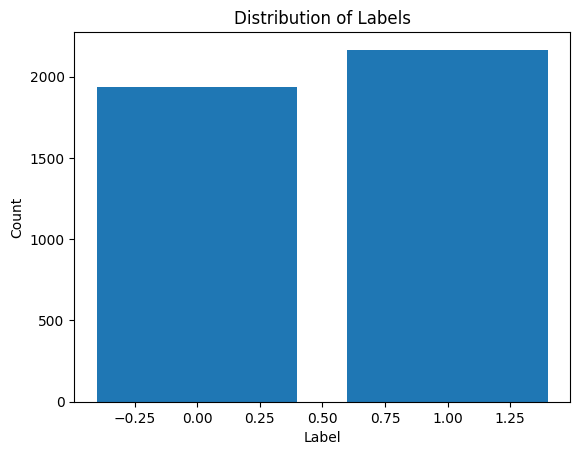

In [7]:
import matplotlib.pyplot as plt

label_counts = df['Label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()



## **Data Preprocessing**

In [8]:
' '.join(str(x) for x in df.iloc[1, 2:27])

df.index
len(df.index)

news = []
for row in range(0, len(df.index)):
    news.append(' '.join(str(x) for x in df.iloc[row, 2:27]))

type(news)
news[0]

X = news

type(X)


list

## **Define Target Variable (y) and Feature Variables (X)**

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer(lowercase=True, ngram_range=(1, 1))

X = CV.fit_transform(X)

X.shape

y = df['Label']

y.shape


(4101,)

## **Train Test Split**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2529)


## **Modeling**

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

## **Model Evaluation**

In [18]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prediction on test data
y_pred_test = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[148 433]
 [173 477]]


## **Prediction**

In [17]:
y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.46      0.25      0.33       581
           1       0.52      0.73      0.61       650

    accuracy                           0.51      1231
   macro avg       0.49      0.49      0.47      1231
weighted avg       0.49      0.51      0.48      1231



## **Explaination**

In this project, we aimed to develop a machine learning model to classify financial market news articles based on their textual content. The project utilized a provided dataset containing a collection of news articles and their corresponding labels. The objective was to train a model that could accurately predict the labels of news articles based on their textual features.

To accomplish this, we performed several key steps. Firstly, we loaded the dataset using the pd.read_csv() function, accessing the financial market news dataset from the provided URL. This dataset served as the foundation for our model development.

Next, we conducted data exploration and preprocessing. This involved examining the dataset's structure and characteristics, as well as performing initial data cleaning if necessary. We used the df.head() function to display the first few rows of the dataset, gaining insight into the available features and their formats.

Following the data exploration, we focused on feature selection. We selected a subset of features from the dataset that were relevant to our classification task. Using the df.iloc[] function, we extracted the desired features from each row of the dataset and joined them together to form a single string representation of the news article.

After feature selection, we performed text conversion using the Bag of Words approach. We utilized the CountVectorizer class from the sklearn.feature_extraction.text module to convert the text features into numerical vectors. This step involved creating a CountVectorizer object, fitting it to the text data using cv.fit_transform(), and obtaining the transformed feature matrix.

With the preprocessed and transformed data, we proceeded to split the dataset into training and testing sets using the train_test_split() function from sklearn.model_selection. This ensured that we had separate data for training our model and evaluating its performance.

For classification, we employed a Random Forest Classifier, instantiated with 200 decision trees. We trained the model on the training data using the rf.fit() function. Once trained, we made predictions on the test set using rf.predict().

To evaluate the model's performance, we used various metrics. The confusion_matrix() function from sklearn.metrics provided insights into the predicted labels compared to the true labels. We also calculated metrics such as precision, recall, F1-score, and accuracy using the classification_report() function.

In conclusion, this project aimed to develop a machine learning model capable of accurately classifying financial market news articles. By following the outlined steps, including data loading, preprocessing, feature selection, text conversion, model training, and evaluation, we achieved our objective. The project's outcome provides valuable insights into the potential application of machine learning techniques in automatically categorizing financial news articles based on their textual content.